In [1]:
import QuantLib as ql
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import CubicHermiteSpline, CubicSpline, KroghInterpolator

%matplotlib inline

# 1-D interpolation

In [2]:
x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.0)

In [3]:
xnew = np.linspace(0, 10, num=1001)
ynew = np.interp(xnew, x, y)

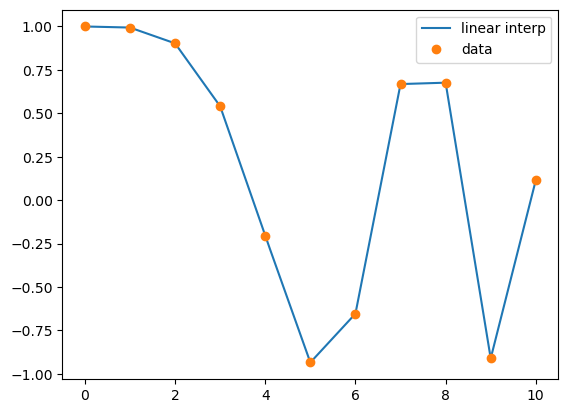

In [4]:
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

In [13]:
ql_lin_interp = ql.LinearInterpolation(ql.Array(x.tolist()), ql.Array(y.tolist()))

In [16]:
ynew_ql = np.asarray([ql_lin_interp(x) for x in xnew])

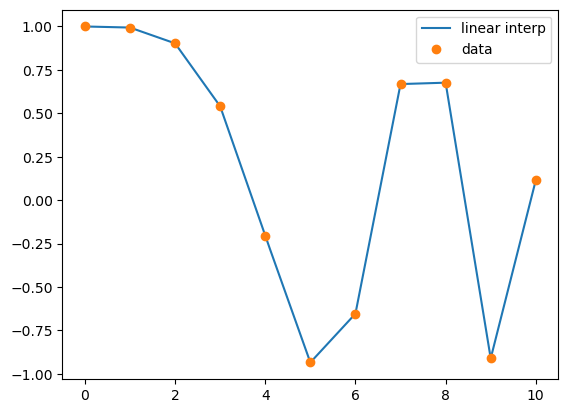

In [17]:
plt.plot(xnew, ynew_ql, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()

# Cubic Spline


In [18]:
from scipy.interpolate import CubicSpline
spl = CubicSpline(x, y)

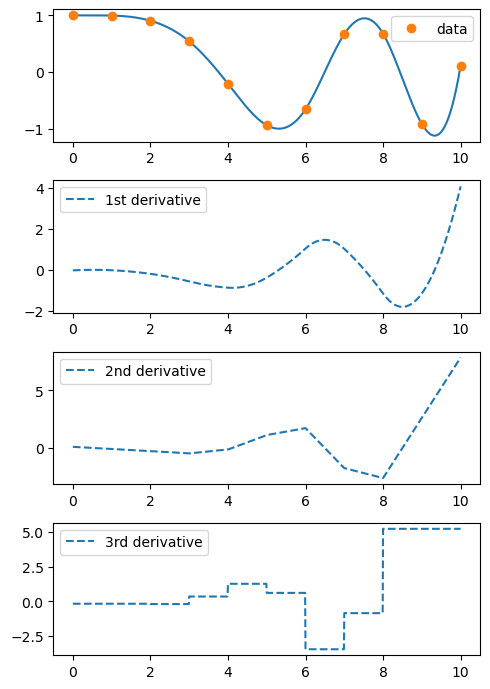

In [19]:
fig, ax = plt.subplots(4, 1, figsize=(5, 7))
xnew = np.linspace(0, 10, num=1001)
ax[0].plot(xnew, spl(xnew))
ax[0].plot(x, y, 'o', label='data')
ax[1].plot(xnew, spl(xnew, nu=1), '--', label='1st derivative')
ax[2].plot(xnew, spl(xnew, nu=2), '--', label='2nd derivative')
ax[3].plot(xnew, spl(xnew, nu=3), '--', label='3rd derivative')
for j in range(4):
    ax[j].legend(loc='best')
plt.tight_layout()
plt.show()

# QuantLib 1-D Interpolator 
LinearInterpolation
LogLinearInterpolation
BackwardFlatInterpolation
ForwardFlatInterpolation

CubicNaturalSpline
LogCubicNaturalSpline
MonotonicCubicNaturalSpline
MonotonicLogCubicNaturalSpline
KrugerCubic
KrugerLogCubic

FritschButlandCubic
FritschButlandLogCubic

Parabolic
LogParabolic
MonotonicParabolic
MonotonicLogParabolic

LagrangeInterpolation

In [ ]:
ql.LinearInterpolation()
ql.LogLinearInterpolation()
ql.BackwardFlatInterpolation()
ql.ForwardFlatInterpolation()
ql.CubicNaturalSpline()
ql.LogCubicNaturalSpline()
ql.MonotonicCubicNaturalSpline()
ql.KrugerCubic()
ql.FritschButlandCubic()
ql.Parabolic()
ql.LagrangeInterpolation()
# ql.ChebyshevInterpolation() see signature
# ql.ConvexMonotoneInterpolation()

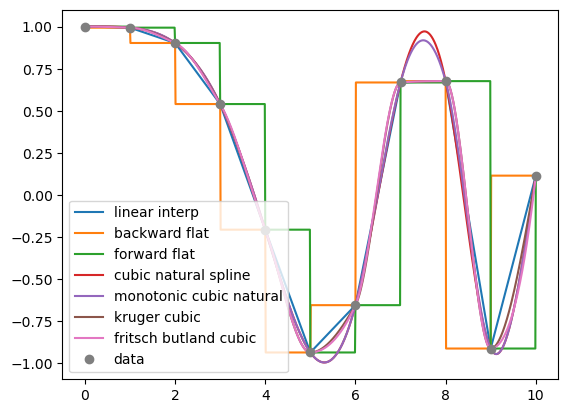

In [12]:
interp1 = ql.BackwardFlatInterpolation(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_1 = np.asarray([interp1(x) for x in xnew])
interp2 = ql.ForwardFlatInterpolation(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_2 = np.asarray([interp2(x) for x in xnew])
interp3 = ql.CubicNaturalSpline(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_3 = np.asarray([interp3(x) for x in xnew])
interp4 = ql.MonotonicCubicNaturalSpline(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_4 = np.asarray([interp4(x) for x in xnew])
interp5 = ql.KrugerCubic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_5 = np.asarray([interp5(x) for x in xnew])
interp6 = ql.FritschButlandCubic(ql.Array(x.tolist()), ql.Array(y.tolist()))
ynew_6 = np.asarray([interp6(x) for x in xnew])
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(xnew, ynew_1, '-', label='backward flat')
plt.plot(xnew, ynew_2, '-', label='forward flat')
plt.plot(xnew, ynew_3, '-', label='cubic natural spline')
plt.plot(xnew, ynew_4, '-', label='monotonic cubic natural')
plt.plot(xnew, ynew_5, '-', label='kruger cubic')
plt.plot(xnew, ynew_6, '-', label='fritsch butland cubic')
plt.plot(x, y, 'o', label='data')
plt.legend(loc='best')
plt.show()